### Sklearn:

#### Linear Regression: California Housing Project: 

Sklearn is a Machine Learning Python Package which allows us to build models. For the first part, I'm using the Califronia Housing dataset, which represents data on blocks in the US. A block is a collection of houses/flats, we use blocks as it's the smallest geographical unit for which the US will release stats. We have data on the blocks, and the labelled data is the median house price in the corresponding block.

In [28]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [2]:
X, y = datasets.fetch_california_housing(return_X_y=True, as_frame=True)

In [3]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [5]:
model = linear_model.LinearRegression().fit(X, y)
y_pred = model.predict(X)

print(y_pred[:5].reshape((5,1)))

[[4.13164983]
 [3.97660644]
 [3.67657094]
 [3.2415985 ]
 [2.41358744]]


The score is a measure of how accurate our model is, in particular it returns the R^2 value. 

In [6]:
print(model.score(X, y))

0.6062326851998051


Model Parameters:

In [7]:
print(model.coef_)

[ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


Text(0, 0.5, 'Median Apartment Price')

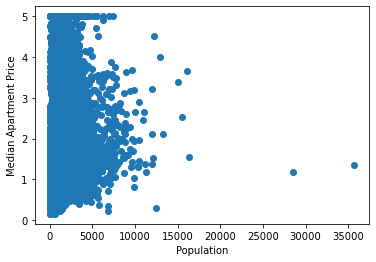

In [8]:
plt.scatter(X['Population'], y, marker='o')
plt.xlabel('Population')
plt.ylabel('Median Apartment Price')

Let's fit a model to see the effect of Population on Median Apartment prediction:

In [9]:
model_2 = linear_model.LinearRegression().fit(pd.DataFrame(X['Population']), y)
print(model_2.intercept_,model_2.coef_)

2.104362620762733 [-2.51175277e-05]


In [10]:
predict_pop = model_2.predict(pd.DataFrame(X['Population']))

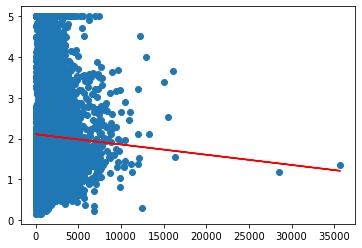

In [11]:
plt.scatter(X['Population'], y, marker='o')
plt.plot(pd.DataFrame(X['Population']), predict_pop, color='r')

R^2 Score:

In [12]:
print(model_2.score(pd.DataFrame(X['Population']), y))

0.0006076066693254667


We can see that the model is very poorly fit as expected

#### Logistic Regression: Breast Cancer Dataset:

Load in Datasets:

In [13]:
X, y = datasets.load_breast_cancer(return_X_y=True, as_frame=True)

In [14]:
X.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [15]:
y.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

Split data into testing/training sets:

In [16]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.5, random_state=10)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(284, 30) (285, 30) (284,) (285,)


Feature Reduction:

- Removing features that have a low correlation to the label. ie have little influence on whether cancer is melignant or beningn. 
- Identify features that have pairwise collinearity and remove the feature that has a lower correlation with the output.

Let's start by computing the correlation matrix:

In [17]:
corr_matrix_X = pd.concat([train_X, train_y], axis=1).corr()

In [18]:
corr_matrix_X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.299280,0.997960,0.987147,0.170986,0.506223,0.704759,0.822951,0.080925,-0.296323,...,0.290750,0.965719,0.938567,0.101249,0.418298,0.568089,0.752790,0.116184,0.004345,-0.709561
mean texture,0.299280,1.000000,0.305611,0.313665,-0.069646,0.208955,0.326433,0.292157,0.088995,-0.064049,...,0.908901,0.337525,0.335948,0.022331,0.240719,0.288688,0.276543,0.068204,0.120324,-0.430196
mean perimeter,0.997960,0.305611,1.000000,0.986837,0.204059,0.555994,0.743676,0.851075,0.114573,-0.246986,...,0.294732,0.970588,0.939432,0.129798,0.459496,0.603710,0.779224,0.136693,0.048301,-0.721196
mean area,0.987147,0.313665,0.986837,1.000000,0.174582,0.503148,0.713475,0.826062,0.096339,-0.267766,...,0.297637,0.963537,0.962081,0.109997,0.397721,0.553336,0.733661,0.101425,0.004116,-0.689124
mean smoothness,0.170986,-0.069646,0.204059,0.174582,1.000000,0.611007,0.482636,0.539069,0.561070,0.544199,...,-0.033247,0.216493,0.188653,0.791857,0.422231,0.384686,0.475533,0.375793,0.440463,-0.312700


<Figure size 1152x1152 with 0 Axes>

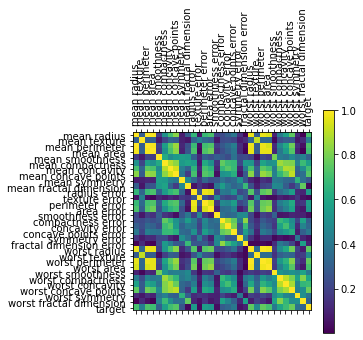

In [19]:
def plot_corr_mat(corr_matrix):
    plt.figure(figsize=(16,16))
    plt.matshow(abs(corr_matrix))
    plt.xticks(range(corr_matrix.shape[1]), corr_matrix.columns, rotation='vertical')
    plt.yticks(range(corr_matrix.shape[1]), corr_matrix.columns, rotation='horizontal')
    plt.colorbar()
    plt.show()

plot_corr_mat(corr_matrix_X)

Let's filter those features where the correlation is less than 0.2:

In [20]:
min_corr = 0.2
abs_corr = abs(corr_matrix_X)
target_corr = pd.DataFrame(abs_corr['target']).rename(columns={'target' : 'Correlation'})
useful_features_df = target_corr.loc[target_corr['Correlation'] > min_corr]
useful_features_df.reset_index(inplace=True)
useful_features = list(useful_features_df['index'])
useful_features.remove('target')


Now I have a list of the remaining features, I can discard the others:

In [21]:
train_X = train_X[useful_features]
test_X = test_X[useful_features]

train_X.shape


(284, 25)

In [25]:
log_model = linear_model.LogisticRegression(max_iter=1000).fit(train_X, train_y)

/Users/tajsmac/opt/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


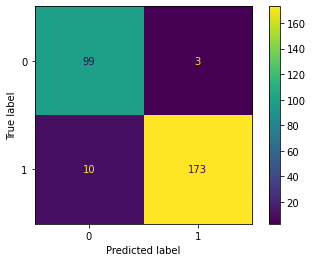

In [37]:
predict_cancer = log_model.predict(test_X)
f1_score(test_y, predict_cancer)
confusion_mat = confusion_matrix(test_y, predict_cancer)
pic = ConfusionMatrixDisplay(confusion_mat)
pic.plot()
plt.show()